# 기계학습 3주차 과제

### 4강 슬라이드 내용 실행

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

Text(0, 0.5, '타깃')

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


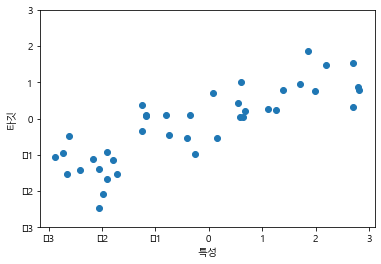

In [3]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

##### KNN 회귀

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [5]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [6]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


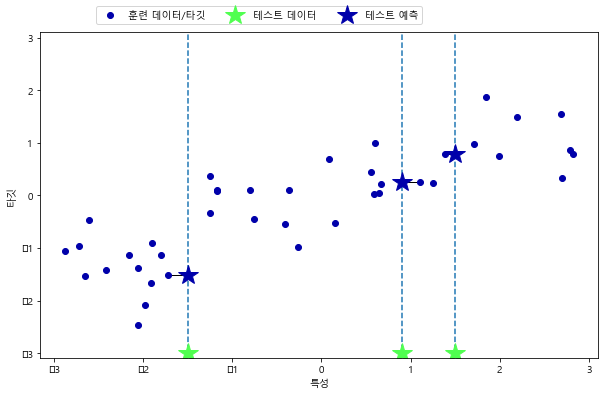

In [7]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


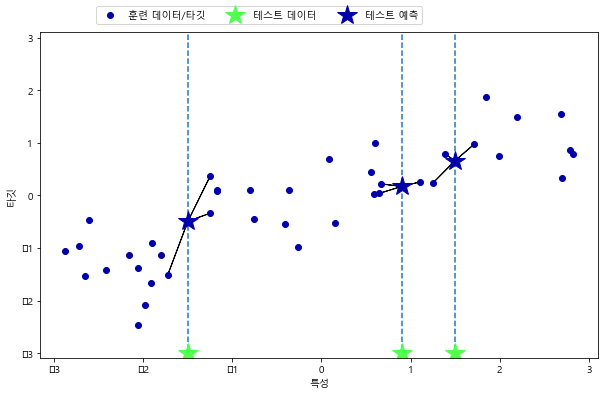

In [8]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.4)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [10]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.42989718  0.82597372 -1.89415682 -1.04203645 -1.63113382
  0.16931864  0.91241374 -0.44561282 -1.04203645 -0.49284968  0.82597372
 -1.04203645  0.41271285 -0.44561282  0.42989718]


In [11]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.68


line = np.linspace(-3, 3, 1000)의 의미는 -3과 3사이에 1000개의 데이터포인트를  
만든다는 의미입니다.

X_train.shape:(30, 1) X_test.shape:(10, 1)
X_train.shape:(30, 1) X_test.shape:(10, 1)
X_train.shape:(30, 1) X_test.shape:(10, 1)


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


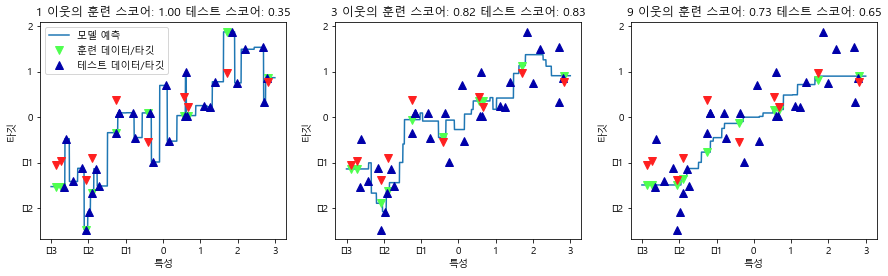

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

fig, axes = plt.subplots(1,3, figsize=(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    print("X_train.shape:{}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_test, reg.predict(X_test),'v', c=mglearn.cm3(2), markersize=8)
    ax.plot(X_train, y_train,'^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    
    ax.set_title(
    "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

In [14]:
# x 값과 y 값
x=[2, 4, 6, 8]
y=[81, 93, 91, 97]

# x와 y의 평균값
mx = np.mean(x)
my = np.mean(y)
print("x의 평균값:", mx)
print("y의 평균값:", my)

# 기울기 공식의 분모
divisor = sum([(mx - i)**2 for i in x])

# 기울기 공식의 분자
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)
print("분모:", divisor)
print("분자:", dividend)

# 기울기와 y 절편 구하기
a = dividend / divisor
b = my - (mx*a)

# 출력으로 확인
print("기울기 a =", a)
print("y 절편 b =", b)

x의 평균값: 5.0
y의 평균값: 90.5
분모: 20.0
분자: 46.0
기울기 a = 2.3
y 절편 b = 79.0


In [15]:
ab=[3,76]

data = [[2,81], [4,93], [6,91], [8,97]]
x=[i[0] for i in data]
y=[i[1] for i in data]

def predict(x):
    return ab[0]*x + ab[1]

def rmse(p,a):
    return np.sqrt(((p-a)**2).mean())

def rmse_val(predict_result, y):
    return rmse(np.array(predict_result), np.array(y))

predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부한 시간 = %.f, 실제 점수 = %.f, 예측 점수 = %.f" % (x[i],y[i], predict(x[i])))

# 최종 RMSE 출력
print("rmse 최종값: " + str(rmse_val(predict_result,y)))

공부한 시간 = 2, 실제 점수 = 81, 예측 점수 = 82
공부한 시간 = 4, 실제 점수 = 93, 예측 점수 = 88
공부한 시간 = 6, 실제 점수 = 91, 예측 점수 = 94
공부한 시간 = 8, 실제 점수 = 97, 예측 점수 = 100
rmse 최종값: 3.3166247903554


##### 선형회귀(Linear Regression)

In [18]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train, y_train)
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


lr.coef_ : 계수(기울기)
lr.intercept_ : 절편

In [19]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


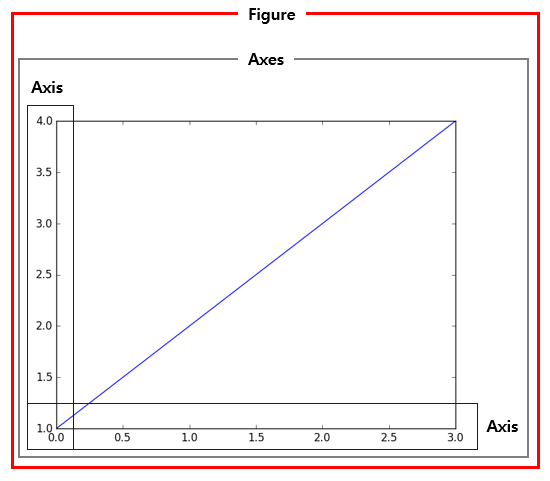  

ax=plt.gca()는 현재의 Axes객체를 구해주는 함수  
ax.set_aspect()는 종횡비를 설정하는 함수, 'equal'을 종횡비로 사용하면 데이터포인트에서 X축 및 Y축의 플롯 단위에 대해 동일한 스케일링으로 플롯을 얻습니다.

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


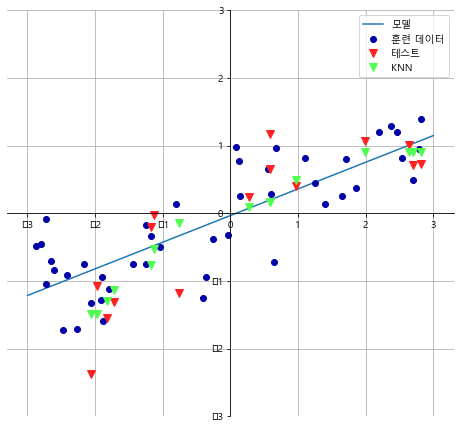

In [21]:
plt.figure(figsize=(8, 8))
plt.plot(line, lr.predict(line))
plt.plot(X_train, y_train, 'o', c=mglearn.cm2(0))
plt.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
# KNN 결과 출력
#1차원 특징이라서 정확률이 낮다. 샘플수가 커질수록 정확률이 낮다. 데이터의 분포가 퍼져서
plt.plot(X_test, reg.predict(X_test),'v', c=mglearn.cm3(2), markersize=8)

ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.set_ylim(-3, 3)
#ax.set_xlabel("Feature") #ax.set_ylabel("Target")
ax.legend(["모델", "훈련 데이터", "테스트", "KNN"], loc="best")
ax.grid(True)
ax.set_aspect('equal')

In [22]:
from sklearn.datasets import load_boston
boston = load_boston()

print("boston.keys(): {}\n".format(boston.keys()))
print("Data의 크기: {}\n".format(boston['data'].shape))
print("특성 이름:\n{}\n".format(boston.feature_names))
print(boston['DESCR'] + "\n...")

df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df.head())

boston.keys(): dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Data의 크기: (506, 13)

특성 이름:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS 

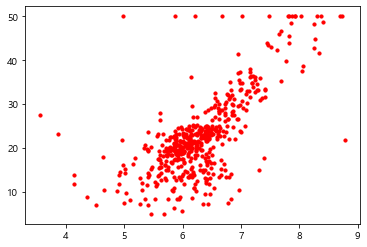

In [23]:
plt.scatter(boston.data[:,5], boston.target, color='r', s=10)

LinearRegression의 함수에 인자로 전달하기 위해서  
np.atleast_2d()를 통해서 (506,)를 2차원인 (1,506)로 바꾸고  
np.transpose()를 통해서 (506,1)로 바꿈

In [24]:
X = boston.data[:,5]

print(X.shape)

X_1 = np.atleast_2d(X)
X_2 = np.transpose(X_1)
print(X_2.shape)
y=boston.target

lr.fit(X_2,y)

y_predicted = lr.predict(X_2)

print("w[0]: %f b: %f" % (lr.coef_[0], lr.intercept_))

(506,)
(506, 1)
w[0]: 9.102109 b: -34.670621


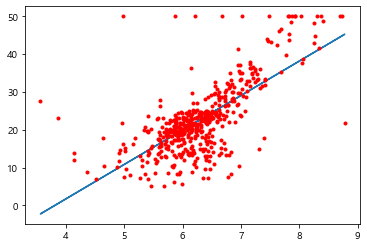

In [25]:
plt.plot(X_2, y_predicted)
plt.plot(X_2, y, 'o', color='r', markersize=3)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
print("X_train.scope: {}". format(X_train.shape), "X_test.shape: {}".format(X_test.shape))
lr = LinearRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

X_train.scope: (379, 13) X_test.shape: (127, 13)
훈련 세트 점수: 0.77
테스트 세트 점수: 0.64


In [27]:
lr = KNeighborsRegressor().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.71
테스트 세트 점수: 0.46


In [28]:
lr = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.78
테스트 세트 점수: 0.51


In [29]:
X, y = mglearn.datasets.load_extended_boston()

print("X.shape: {}".format(X.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))
lr = LinearRegression().fit(X_train, y_train)

X.shape: (506, 104)
X_train.shape: (379, 104) X_test.shape:(127, 104)


In [30]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수 : 0.61


In [31]:
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(knn.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.61


### 4강 조정 및 테스트

k값이 샘플의 수와 같아서 모든 값을 참고할 때는 예측 값이 평균 값으로 나옴을 확인했습니다.

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


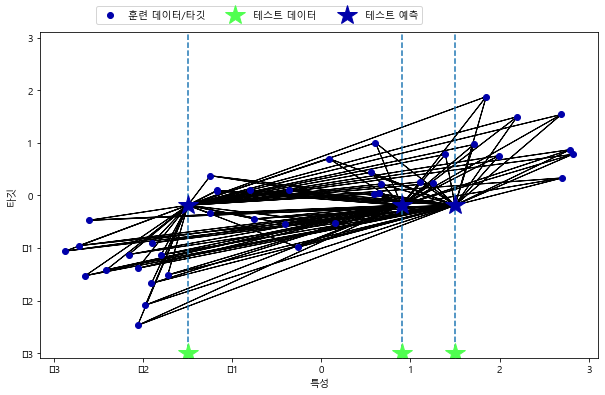

In [32]:
mglearn.plots.plot_knn_regression(n_neighbors=40)

k의 값을 12, 15, 18로 증가시키며 k값(참고하는 샘플의 수)가 증가할 수록 예측되는 선이 부드러워 진다는 것을 확인하였습니다.

X_train.shape:(30, 1) X_test.shape:(10, 1)
X_train.shape:(30, 1) X_test.shape:(10, 1)
X_train.shape:(30, 1) X_test.shape:(10, 1)


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


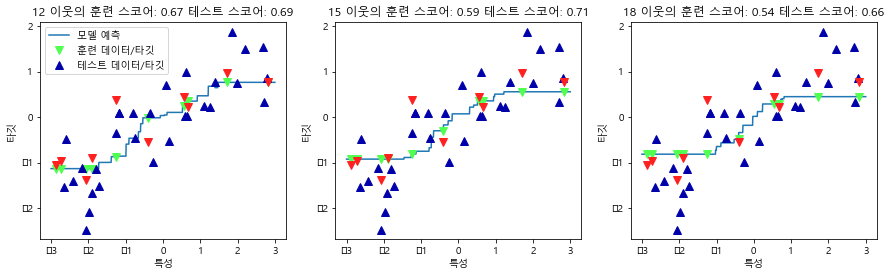

In [34]:
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

fig, axes = plt.subplots(1,3, figsize=(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([12,15,18], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    print("X_train.shape:{}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_test, reg.predict(X_test),'v', c=mglearn.cm3(2), markersize=8)
    ax.plot(X_train, y_train,'^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    
    ax.set_title(
    "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

슬라이드의 내용에 값을 추가해봤습니다. 그 결과 추가시킨 데이터에 한해서 기울기가 조금 감소하였고, 절편이 증가함을 확인하였습니다.

In [35]:
# x 값과 y 값
x=[1, 2, 4, 5, 6, 8, 9]
y=[85, 81, 93, 95, 91, 97, 97]

# x와 y의 평균값
mx = np.mean(x)
my = np.mean(y)
print("x의 평균값:", mx)
print("y의 평균값:", my)

# 기울기 공식의 분모
divisor = sum([(mx - i)**2 for i in x])

# 기울기 공식의 분자
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)
print("분모:", divisor)
print("분자:", dividend)

# 기울기와 y 절편 구하기
a = dividend / divisor
b = my - (mx*a)

# 출력으로 확인
print("기울기 a =", a)
print("y 절편 b =", b)

x의 평균값: 5.0
y의 평균값: 91.28571428571429
분모: 52.0
분자: 94.0
기울기 a = 1.8076923076923077
y 절편 b = 82.24725274725276


위에서 추가시킨 데이터를 대입하였고, 기울기가 3이고 절편이 76일 때, 추가시킨 데이터에 한해서는 평균제곱근오차가 증가함을 확인하였습니다. 또한, 공부한 시간이 8일 때, 예측 점수가 100임을 통해서 공부한 시간이 8시간 이상인 데이터가 입력될 경우 해당 모델의 오차가 증가할 것이라고 예측하였습니다.

In [36]:
ab=[3,76]

data = [[1,85], [2,81], [4,93], [5,95], [6,91], [8,97], [9,97]]
x=[i[0] for i in data]
y=[i[1] for i in data]

def predict(x):
    return ab[0]*x + ab[1]

def rmse(p,a):
    return np.sqrt(((p-a)**2).mean())

def rmse_val(predict_result, y):
    return rmse(np.array(predict_result), np.array(y))

predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부한 시간 = %.f, 실제 점수 = %.f, 예측 점수 = %.f" % (x[i],y[i], predict(x[i])))

# 최종 RMSE 출력
print("rmse 최종값: " + str(rmse_val(predict_result,y)))

공부한 시간 = 1, 실제 점수 = 85, 예측 점수 = 79
공부한 시간 = 2, 실제 점수 = 81, 예측 점수 = 82
공부한 시간 = 4, 실제 점수 = 93, 예측 점수 = 88
공부한 시간 = 5, 실제 점수 = 95, 예측 점수 = 91
공부한 시간 = 6, 실제 점수 = 91, 예측 점수 = 94
공부한 시간 = 8, 실제 점수 = 97, 예측 점수 = 100
공부한 시간 = 9, 실제 점수 = 97, 예측 점수 = 103
rmse 최종값: 4.342481186734475


위의 데이터에서 기울기와 절편 값을 바꾸었고, 평균제곱근오차가 증가한 것으로 보았을 때, 해당 데이터에 한해서 위의 모델보다는 성능이 좋지 못함을 알 수 있었습니다.

In [37]:
ab=[1.2,80]

data = [[1,85], [2,81], [4,93], [5,95], [6,91], [8,97], [9,97]]
x=[i[0] for i in data]
y=[i[1] for i in data]

def predict(x):
    return ab[0]*x + ab[1]

def rmse(p,a):
    return np.sqrt(((p-a)**2).mean())

def rmse_val(predict_result, y):
    return rmse(np.array(predict_result), np.array(y))

predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부한 시간 = %.f, 실제 점수 = %.f, 예측 점수 = %.f" % (x[i],y[i], predict(x[i])))

# 최종 RMSE 출력
print("rmse 최종값: " + str(rmse_val(predict_result,y)))

공부한 시간 = 1, 실제 점수 = 85, 예측 점수 = 81
공부한 시간 = 2, 실제 점수 = 81, 예측 점수 = 82
공부한 시간 = 4, 실제 점수 = 93, 예측 점수 = 85
공부한 시간 = 5, 실제 점수 = 95, 예측 점수 = 86
공부한 시간 = 6, 실제 점수 = 91, 예측 점수 = 87
공부한 시간 = 8, 실제 점수 = 97, 예측 점수 = 90
공부한 시간 = 9, 실제 점수 = 97, 예측 점수 = 91
rmse 최종값: 6.2367573992534675


n_samples=300, test=0.25, random_state=42인 경우  
K=5인 KNN 회귀가 선형 회귀에 비해서 훈련 세트와 테스트 세트에서 모두 높은 정확도를 보임을 확인하였습니다.

In [39]:
X, y = mglearn.datasets.make_wave(n_samples=300)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train, y_train)
reg = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

print("KNN 훈련 세트 점수: {:.2f}".format(reg.score(X_train, y_train)))
print("KNN 테스트 세트 점수: {:.2f}".format(reg.score(X_test, y_test)))

print("Linear 훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("Linear 테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

KNN 훈련 세트 점수: 0.79
KNN 테스트 세트 점수: 0.75
Linear 훈련 세트 점수: 0.67
Linear 테스트 세트 점수: 0.70


자치시(town)별 1인당 범죄율이 0인 경우는 가격이 다양하지만, 확실히 범죄율이 높아질 수록 값이 떨어지는 것을 확인할 수 있었습니다.

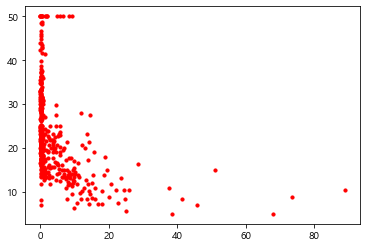

In [44]:
plt.scatter(boston.data[:,0], boston.target, color='r', s=10)

### 5강 슬라이드 내용 실행

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

##### 릿지 회귀(Ridge Regression)

class sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, 
random_state=None  

alpha : {float, ndarray of shape (n_targets,)}, default=1.0  
규제의 강도  

fit_intercept : bool, default=True  
절편의 사용 여부  

normalize : bool, default=False  
fit_intercept가 false라면 무시, true라면 X를 회귀 전에 정규화  

copy_X : bool, default=True  
true면 copy해서 사용하고 false면 덮어쓰기  

max_iter : int, default=None  
conjugate gradient solver의 최대 반복 횟수  

tol :float, default=1e-3  
정밀도  

solver : {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}, default=’auto’  

random_state : int, RandomState instance, default=None  
solver가 sag또는 saga일 때 사용  

In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
훈련 세트 점수: 0.75


alpha는 패널티의 가중치이기 때문에 그 값이 클 수록 계수들이 0에 가까워지고(과소적합), 작을 수록 계수 편차가 커집니다(과대적합). 아래의 결과를 통해서 너무 작아도 너무 커도 안되는 중간의 적절한 값으로 설정해야 훈련과 테스트에서 모두 좋은 성능을 기대할 수 있음을 확인하였습니다.

In [5]:
ridge = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.79
훈련 세트 점수: 0.64


In [6]:
ridge = Ridge(alpha=5).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.82
훈련 세트 점수: 0.68


In [7]:
ridge = Ridge(alpha=0.5).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.90
훈련 세트 점수: 0.77


In [8]:
ridge = Ridge(alpha=0.3).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.91
훈련 세트 점수: 0.77


In [9]:
ridge = Ridge(alpha=0.2).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.92
훈련 세트 점수: 0.77


In [10]:
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.93
훈련 세트 점수: 0.77


In [11]:
ridge = Ridge(alpha=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.94
훈련 세트 점수: 0.70


##### 라쏘 회귀(lasso Regression)

class sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000,  tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)

precomute : ‘auto’, bool or array-like of shape (n_features, n_features), default=False  
계산속도를 높이기 위해서 미리 정의된 Gram 행렬 사용 여부, 희소 입력에 대해서는 항상 true  

warm_start : bool, default=False  
true라면 이전 솔루션을 다시 사용  

positive : bool, default=False  
true라면 계수를 양수로

selection : {‘cyclic’, ‘random’}, default=’cyclic’  
random이라면 반복할 때마다 랜덤 계수 생성

In [12]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [13]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [14]:
lasso00001 = Lasso(alpha = 0.0001, max_iter=100000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


In [15]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


In [16]:
lasso = Lasso().fit(X_train, y_train)

print("계수값:\n", lasso.coef_)
print(np.where(lasso.coef_ != 0))

계수값:
 [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -5.3529079  -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -1.05063037 -3.3104274  -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.41386744
 -0.       

Text(0, 0.5, '계수 크기')

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


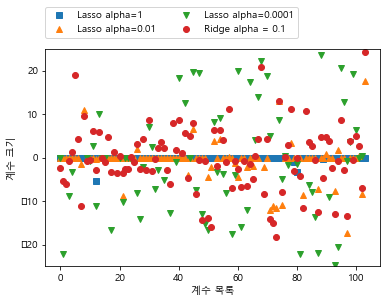

In [17]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha = 0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

##### 로지스틱 회귀분석(Logistic Regression)

class sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

penalty : {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’ 
패털티의 표준을 지정  
‘newton-cg’,‘sag’및‘lbfgs’솔버는 l2 페널티 만 지원합니다. ‘elasticnet’은‘saga’솔버에서만 지원됩니다.  

dual : bool, default=False  
Dual or primal. 이중 공식은 liblinear 솔버를 사용하는 l2 패널티에 대해서만 구현됩니다. n_samples> n_features 인 경우 dual = False를 선호합니다.  

tol : float, default=1e-4  
Tolerance for stopping criteria.  

C : float, default=1.0  
규제의 강도, 양수만 가능  

intercept_scaling : float, default=1   
x는 [x, self.intercept_scaling]이 되고, 절편의 값이 intercept_scaling * synthetic_feature_weight이 된다.  

class_weight : dict or ‘balanced’, default=None  
Weights associated with classes in the form {class_label: weight}  


solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’ 

max_iter : int, default=100  
솔버가 수렴하는 데 걸리는 최대 반복 횟수입니다.  


multi_class : {‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’ 
'auto'는 데이터가 이진이거나 solver = 'liblinear'인 경우 'ovr'을 선택하고 그렇지 않으면 'multinomial'을 선택합니다.  

verbose : int, default=0  

n_jobs : int, default=None  
multi_class =’ovr’”인 경우 클래스를 병렬화 할 때 사용되는 CPU 코어 수입니다.  

l1_ratio : float, default=None  
0 <l1_ratio <1의 경우 패널티는 L1과 L2의 조합입니다.  
l1_ratio = 0을 설정하는 것은 패널티 = 'l2'를 사용하는 것과 같고, l1_ratio = 1을 설정하는 것은 패널티 = 'l1'을 사용하는 것과 같습니다.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()

print(list(iris.keys()))
print("타깃의 이름: {}".format(iris['target_names']))
print("특성의 이름: {}".format(iris['feature_names']))
X=iris["data"][:,3:] # petal width
print(X.shape)
y=(iris["target"]==2).astype(np.int) # 'virginica'면 1 아니면 0
print(y.shape)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
타깃의 이름: ['setosa' 'versicolor' 'virginica']
특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 1)
(150,)


아래의 plt.plot에서 "b."이나 "g-"등의 문자열이 알파벳=색, 특수기호=선의 모양 임을 확인하였습니다.  

아래에서 패널티를 l1방법으로도 하였는데, C의 값이 모두 1이라서 비슷한 모양인 것으로 추정됩니다.

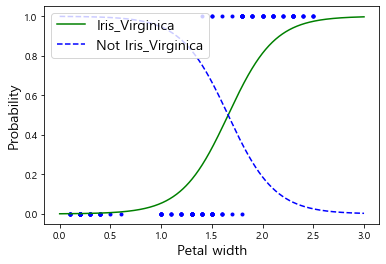

In [19]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new, y_proba[:,1], "g-", label="Iris_Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris_Virginica")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

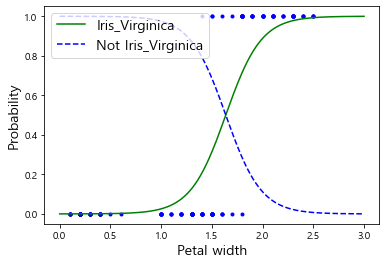

In [20]:
log_reg = LogisticRegression(solver='liblinear', penalty='l1')
log_reg.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new, y_proba[:,1], "g-", label="Iris_Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris_Virginica")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [21]:
log_reg.predict([[1.7],[1.5],[1.3],[2.0]])

array([1, 0, 0, 1])

C:\anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


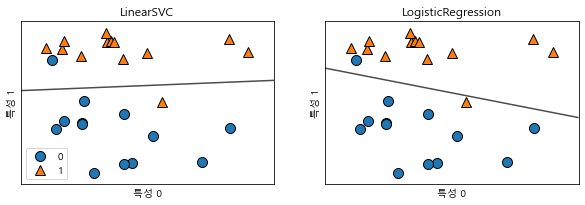

In [22]:
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

In [23]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test=train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [24]:
logreg100 = LogisticRegression(C = 100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


In [25]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


아래의 결과를 통해서 해당 데이터에 대해서는 C가 작을 때(규제가 강화될 때)는 l2가, C가 클 때(규제가 완화될 때)는 l1이 더 높은 성능을 보인다는 것을 알 수 있었습니다.

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트확도: 0.98


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


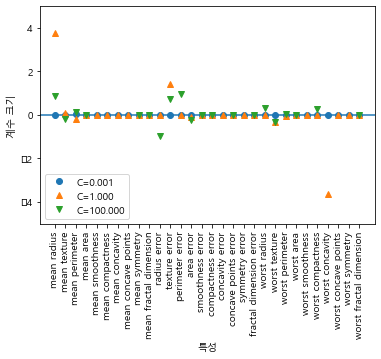

In [26]:
for C, marker in zip([0.001,1,100], ['o','^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3)

C=0.001 인 l2 로지스틱 회귀의 훈련 정확도: 0.95
C=0.001 인 l2 로지스틱 회귀의 테스트확도: 0.94
C=1.000 인 l2 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l2 로지스틱 회귀의 테스트확도: 0.96
C=100.000 인 l2 로지스틱 회귀의 훈련 정확도: 0.98
C=100.000 인 l2 로지스틱 회귀의 테스트확도: 0.97


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


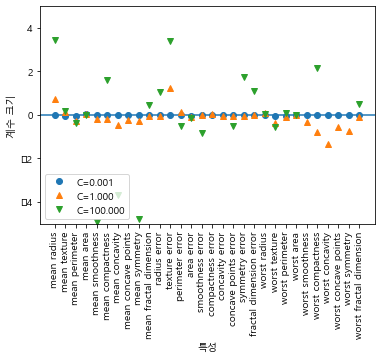

In [27]:
for C, marker in zip([0.001,1,100], ['o','^', 'v']):
    lr_l2 = LogisticRegression(solver='lbfgs', C=C, penalty="l2", max_iter=5000).fit(X_train, y_train)
    print("C={:.3f} 인 l2 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l2.score(X_train, y_train)))
    print("C={:.3f} 인 l2 로지스틱 회귀의 테스트확도: {:.2f}".format(C, lr_l2.score(X_test, y_test)))
    plt.plot(lr_l2.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3)

In [28]:
for C in [0.001,1,100]:
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty='l1', max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    print("사용한 특성의 개수: {}".format(np.sum(lr_l1.coef_ != 0)))
    print("사용한 특성: {}\n".format(lr_l1.coef_))

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
사용한 특성의 개수: 3
사용한 특성: [[ 0.          0.          0.05731205  0.00493849  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.00987386
   0.          0.          0.          0.          0.          0.        ]]

C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
사용한 특성의 개수: 10
사용한 특성: [[ 3.75757146  0.08188349 -0.17263482 -0.01233616  0.          0.
   0.          0.          0.          0.          0.          1.43824774
   0.         -0.093       0.          0.          0.          0.
   0.          0.          0.         -0.33080619 -0.05474809 -0.0171078
   0.          0.         -3.64929523  0.          0.          0.        ]]

C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98
사용한 특성의 개수: 23
사용한 특성: [[ 8.11402

##### 5강 조정 및 테스트

make_wave로 500개의 데이터를 생성하여 회귀모델별로 어느 회귀모델이 적당한지 확인해보았습니다. 현재 생성된 데이터에 대해서는 alpha가 0.3인 라쏘 회귀 모델이 가장 성능이 좋다고 나왔지만 그 값이 비슷하여 특별히 어떤 모델이 적합하다고 할 수는 없었습니다.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=500)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

knn = KNeighborsRegressor(n_neighbors = 3).fit(X_train, y_train)
print("KNN 회귀 훈련 세트 점수: {:.2f}".format(knn.score(X_train, y_train)))
print("KNN 회귀 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

lr = LinearRegression().fit(X_train, y_train)
print("선형 회귀 훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("선형 회귀 테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

for a in [100, 10, 5, 0.5, 0.3, 0.1]:
    ridge = Ridge(alpha = a).fit(X_train, y_train)
    print("릿지 회귀 alpha={} 훈련 세트 점수: {:.2f}".format(a, ridge.score(X_train, y_train)))
    print("릿지 회귀 alpha={} 테스트 세트 점수: {:.2f}".format(a, ridge.score(X_test, y_test)))
    
for a in [1, 0.5, 0.3, 0.1, 0.001]:
    lasso = Lasso(alpha = a).fit(X_train, y_train)
    print("라쏘 회귀 alpha={} 훈련 세트 점수: {:.2f}".format(a, lasso.score(X_train, y_train)))
    print("라쏘 회귀 alpha={} 테스트 세트 점수: {:.2f}".format(a, lasso.score(X_test, y_test)))

KNN 회귀 훈련 세트 점수: 0.85
KNN 회귀 테스트 세트 점수: 0.57
선형 회귀 훈련 세트 점수: 0.68
선형 회귀 테스트 세트 점수: 0.57
릿지 회귀 alpha=100 훈련 세트 점수: 0.67
릿지 회귀 alpha=100 테스트 세트 점수: 0.58
릿지 회귀 alpha=10 훈련 세트 점수: 0.68
릿지 회귀 alpha=10 테스트 세트 점수: 0.57
릿지 회귀 alpha=5 훈련 세트 점수: 0.68
릿지 회귀 alpha=5 테스트 세트 점수: 0.57
릿지 회귀 alpha=0.5 훈련 세트 점수: 0.68
릿지 회귀 alpha=0.5 테스트 세트 점수: 0.57
릿지 회귀 alpha=0.3 훈련 세트 점수: 0.68
릿지 회귀 alpha=0.3 테스트 세트 점수: 0.57
릿지 회귀 alpha=0.1 훈련 세트 점수: 0.68
릿지 회귀 alpha=0.1 테스트 세트 점수: 0.57
라쏘 회귀 alpha=1 훈련 세트 점수: 0.40
라쏘 회귀 alpha=1 테스트 세트 점수: 0.38
라쏘 회귀 alpha=0.5 훈련 세트 점수: 0.61
라쏘 회귀 alpha=0.5 테스트 세트 점수: 0.57
라쏘 회귀 alpha=0.3 훈련 세트 점수: 0.65
라쏘 회귀 alpha=0.3 테스트 세트 점수: 0.59
라쏘 회귀 alpha=0.1 훈련 세트 점수: 0.67
라쏘 회귀 alpha=0.1 테스트 세트 점수: 0.58
라쏘 회귀 alpha=0.001 훈련 세트 점수: 0.68
라쏘 회귀 alpha=0.001 테스트 세트 점수: 0.57


아래는 보스톤 정보를 가지고 로지스틱회귀를 시도하였으나 y_train의 타입이 로지스틱회귀의 결과로는 매칭할 수 없는 연속된 float타입이어서 error가 발생한 코드입니다.

In [35]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [36]:
logreg = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

ValueError: Unknown label type: 'continuous'

아래의 코드는 iris datasets에서 petal width로 virginica인지 아닌지 확인한 것처럼  
boston datasets에서 방의 수에 따라서 값이 20이 넘는지 아닌지로 로지스틱 회귀를 해 본 결과입니다.

In [41]:
from sklearn.datasets import load_boston
boston = load_boston()

X = boston["data"][:,5:6]
print(X.shape)
y = (boston["target"] > 20).astype(np.int)
print(y.shape)

(506, 1)
(506,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

logreg = LogisticRegression().fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.715
테스트 세트 점수: 0.709


In [43]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.720
테스트 세트 점수: 0.701


In [44]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.639
테스트 세트 점수: 0.638


In [46]:
logregL1 = LogisticRegression(solver='liblinear', penalty='l1', max_iter = 1000).fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.720
테스트 세트 점수: 0.701
